In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

res = pd.read_csv('lending-club-values_with_postcode.csv')
# res = pd.read_csv('lending-club-values_without_postcode.csv')


In [2]:
res.head()


,original_probability,new_probability,confidence_diff,original_class,class_change,no_features,nsamples,explainer,time,important_columns,i1,i2,i3,i4,i5,i6,i7,i8,i9,i10
0,1.0,1.000000,0.000000e+00,1,False,0,100,shap,2.791102,68,75,69,74,70,73,72.0,76.0,3.0,2.0,1.0
1,1.0,1.000000,0.000000e+00,1,False,1,100,shap,0.228391,68,75,69,74,70,73,72.0,76.0,3.0,2.0,1.0
2,1.0,1.000000,0.000000e+00,1,False,2,100,shap,0.195639,68,75,69,74,70,73,72.0,76.0,3.0,2.0,1.0
3,1.0,1.000000,3.576279e-07,1,False,3,100,shap,0.180107,68,75,69,74,70,73,72.0,76.0,3.0,2.0,1.0
4,1.0,0.999972,2.837181e-05,1,False,4,100,shap,0.170852,68,75,69,74,70,73,72.0,76.0,3.0,2.0,1.0


Text(0.5, 1.0, "Number of rows predicted as the same class vs predicted as opposite class after columns have been neutralized based on the explainer's identified features")

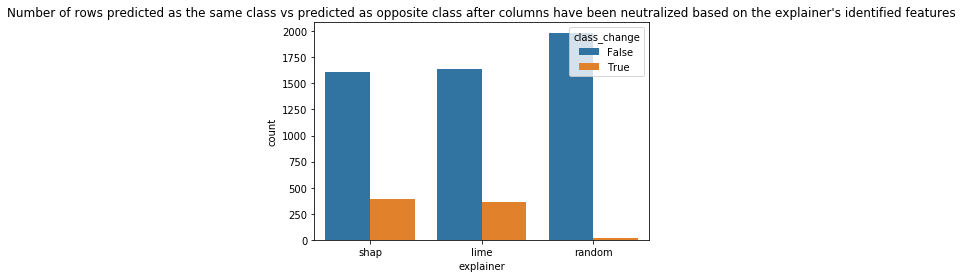

In [3]:
sns.countplot(x="explainer",data=res[(res['nsamples'] == 'auto') ], hue = 'class_change')
plt.title("Number of rows predicted as the same class vs predicted as opposite class after columns have been neutralized based on the explainer's identified features")

In [4]:
res.count()

original_probability    18018
new_probability         18018
confidence_diff         18018
original_class          18018
class_change            18018
no_features             18018
nsamples                18018
explainer               18018
time                    18018
important_columns       18018
i1                      18018
i2                      18018
i3                      18018
i4                      18018
i5                      18018
i6                      18007
i7                      17996
i8                      17886
i9                      17820
i10                     17721
dtype: int64

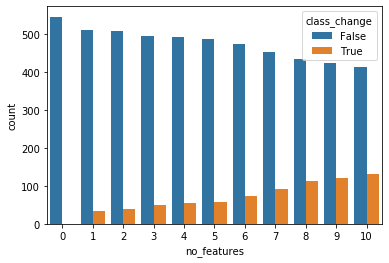

In [5]:
sns.countplot(x="no_features",data=res[(res['nsamples'] == 'auto') ], hue = 'class_change')

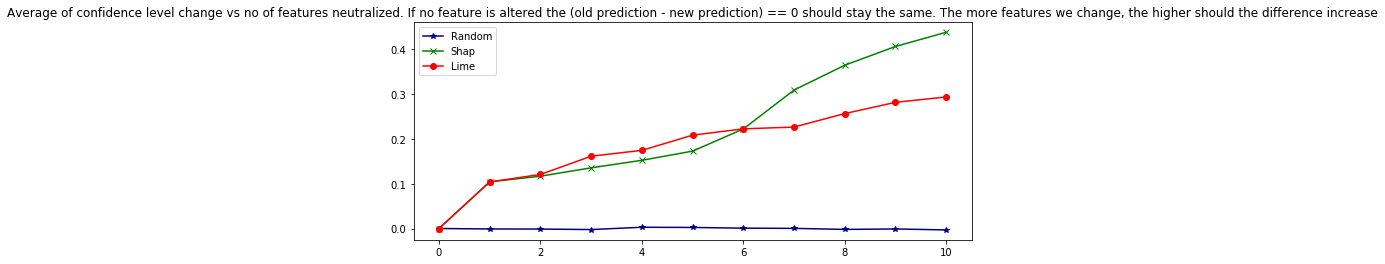

In [6]:
avg_random = res[(res['nsamples'] == 'auto') & (res['explainer'] == 'random')].groupby("no_features")["confidence_diff"].mean() 
avg_shap = res[(res['nsamples'] == 'auto') & (res['explainer'] == 'shap')].groupby("no_features")["confidence_diff"].mean()
avg_lime = res[(res['nsamples'] == 'auto') & (res['explainer'] == 'lime')].groupby("no_features")["confidence_diff"].mean()

plt.figure(figsize=(10,4))
# plt.set_title('Training & Validation Loss')
no_of_features = list(range(0, len(avg_random) ))
plt.plot( no_of_features, avg_random, color='navy', marker='*', linestyle='-', label='Random')
plt.plot( no_of_features, avg_shap, color='green', marker='x', linestyle='-', label='Shap')
plt.plot( no_of_features, avg_lime, color='red', marker='o', linestyle='-', label='Lime')
plt.title("Average of confidence level change vs no of features neutralized. If no feature is altered the (old prediction - new prediction) == 0 should stay the same. The more features we change, the higher should the difference increase")
plt.legend(loc='best')

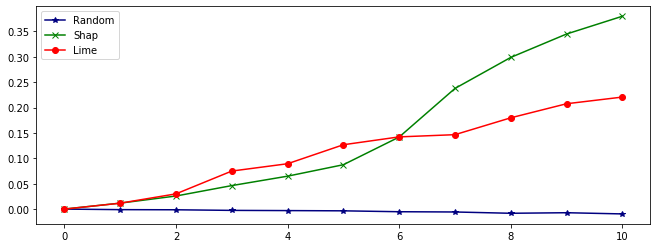

In [7]:
# Same as the graph above but the plot is class specific, in this case for class 1. For class 0, there are not enough datapoints to plot the graph
original_class = 1
avg_random = res[(res['nsamples'] == 'auto') & (res['explainer'] == 'random') & (res['original_class'] == original_class)].groupby("no_features")["confidence_diff"].mean() 
avg_shap = res[(res['nsamples'] == 'auto') & (res['explainer'] == 'shap') & (res['original_class'] == original_class)].groupby("no_features")["confidence_diff"].mean()
avg_lime = res[(res['nsamples'] == 'auto') & (res['explainer'] == 'lime') & (res['original_class'] == original_class)].groupby("no_features")["confidence_diff"].mean()

plt.figure(figsize=(11,4))
# plt.set_title('Training & Validation Loss')
no_of_features = list(range(0, len(avg_random) ))
plt.plot( no_of_features, avg_random, color='navy', marker='*', linestyle='-', label='Random')
plt.plot( no_of_features, avg_shap, color='green', marker='x', linestyle='-', label='Shap')
plt.plot( no_of_features, avg_lime, color='red', marker='o', linestyle='-', label='Lime')
plt.legend(loc='best')

In [8]:
res[res["original_class"] == 0].head(5)

,original_probability,new_probability,confidence_diff,original_class,class_change,no_features,nsamples,explainer,time,important_columns,i1,i2,i3,i4,i5,i6,i7,i8,i9,i10
198,1.225263e-23,1.225263e-23,0.000000,0,False,0,100,shap,3.073385,69,37,18,22,50,19,71.0,66.0,34.0,64.0,43.0
199,1.225263e-23,9.999939e-01,0.999994,0,True,1,100,shap,0.242351,69,37,18,22,50,19,71.0,66.0,34.0,64.0,43.0
200,1.225263e-23,9.999946e-01,0.999995,0,True,2,100,shap,0.203414,69,37,18,22,50,19,71.0,66.0,34.0,64.0,43.0
201,1.225263e-23,9.999959e-01,0.999996,0,True,3,100,shap,0.203457,69,37,18,22,50,19,71.0,66.0,34.0,64.0,43.0
202,1.225263e-23,9.999971e-01,0.999997,0,True,4,100,shap,0.220551,69,37,18,22,50,19,71.0,66.0,34.0,64.0,43.0


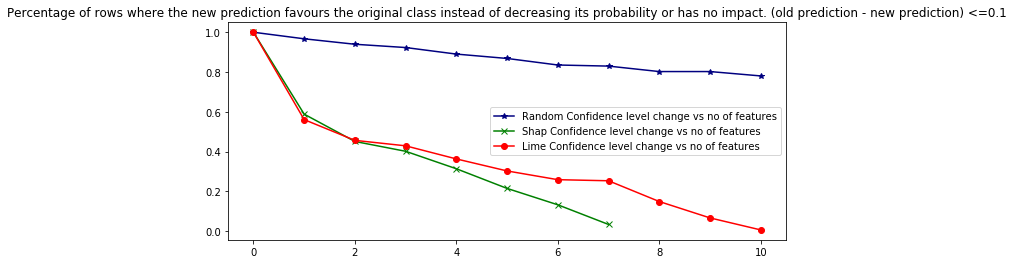

In [9]:

# avg = res[res['confidence_diff'] == 0.0].groupby("no_features")["confidence_diff"].count() / res.groupby("no_features")["confidence_diff"].count() # / res[(res['nsamples'] == 'auto') & (res['explainer'] == 'random')].groupby("no_features")["confidence_diff"].count()
avg_random = res[(res['confidence_diff'] < 0.01) & (res['nsamples'] == 'auto') & (res['explainer'] == 'random')].groupby("no_features")["confidence_diff"].count() / res[(res['nsamples'] == 'auto') & (res['explainer'] == 'random')].groupby("no_features")["confidence_diff"].count()
avg_shap = res[(res['confidence_diff'] < 0.01) & (res['nsamples'] == 'auto') & (res['explainer'] == 'shap')].groupby("no_features")["confidence_diff"].count() / res[(res['nsamples'] == 'auto') & (res['explainer'] == 'shap')].groupby("no_features")["confidence_diff"].count()
avg_lime = res[(res['confidence_diff'] < 0.01) & (res['nsamples'] == 'auto') & (res['explainer'] == 'lime')].groupby("no_features")["confidence_diff"].count() / res[(res['nsamples'] == 'auto') & (res['explainer'] == 'lime')].groupby("no_features")["confidence_diff"].count()

plt.figure(figsize=(10,4))
# plt.set_title('Training & Validation Loss')
no_of_features = list(range(0, len(avg_shap) ))
plt.plot( no_of_features, avg_random, color='navy', marker='*', linestyle='-', label='Random Confidence level change vs no of features')
plt.plot( no_of_features, avg_shap, color='green', marker='x', linestyle='-', label='Shap Confidence level change vs no of features')
plt.plot( no_of_features, avg_lime, color='red', marker='o', linestyle='-', label='Lime Confidence level change vs no of features')
plt.title("Percentage of rows where the new prediction favours the original class instead of decreasing its probability or has no impact. (old prediction - new prediction) <=0.1")
plt.legend(loc='best')

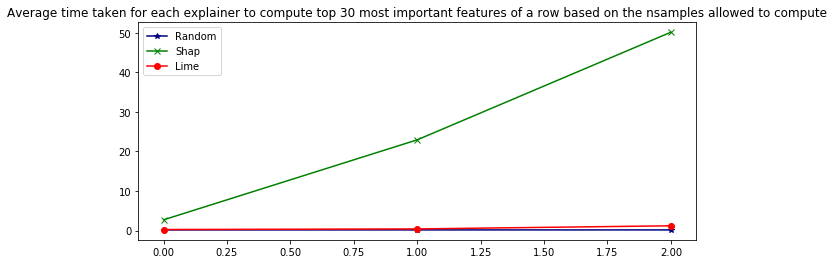

In [10]:

avg_random = res[(res["no_features"]==0) & (res['explainer'] == 'random')].groupby("nsamples")["time"].mean() 
avg_shap = res[(res["no_features"]==0) & (res['explainer'] == 'shap')].groupby("nsamples")["time"].mean()
avg_lime = res[(res["no_features"]==0) & (res['explainer'] == 'lime')].groupby("nsamples")["time"].mean()

plt.figure(figsize=(10,4))
# plt.set_title('Training & Validation Loss')
no_of_features = list(range(0, len(avg_random) ))
plt.plot( no_of_features, avg_random, color='navy', marker='*', linestyle='-', label='Random')
plt.plot( no_of_features, avg_shap, color='green', marker='x', linestyle='-', label='Shap')
plt.plot( no_of_features, avg_lime, color='red', marker='o', linestyle='-', label='Lime')
plt.title("Average time taken for each explainer to compute top 30 most important features of a row based on the nsamples allowed to compute")
plt.legend(loc='best')

In [11]:
avg_shap

nsamples
100      2.729389
1000    22.941548
auto    50.130783
Name: time, dtype: float64